### 聚类算法

该算法通过猜测每个簇的初始聚类中心开始，然后重复将实例分配给最近的簇，并重新计算该簇的聚类中心。

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [38]:
# 寻找数据中每个实例最接近的聚类中心的函数
def find_closest_centroids(X, centroids):
    # 样本点的个数
    m = X.shape[0]
    # 聚类中心的个数
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    # 样本点的遍历
    for i in range(m):
        min_dist = 1000000
        # 聚类中心的遍历
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
                
    return idx

In [39]:
data = loadmat('./datasets/ex7data1.mat')
data 

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 22:41:44 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[3.38156267, 3.38911268],
        [4.52787538, 5.8541781 ],
        [2.65568187, 4.41199472],
        [2.76523467, 3.71541365],
        [2.84656011, 4.17550645],
        [3.89067196, 6.48838087],
        [3.47580524, 3.63284876],
        [5.91129845, 6.68076853],
        [3.92889397, 5.09844661],
        [4.56183537, 5.62329929],
        [4.57407171, 5.39765069],
        [4.37173356, 5.46116549],
        [4.19169388, 4.95469359],
        [5.24408518, 4.66148767],
        [2.8358402 , 3.76801716],
        [5.63526969, 6.31211438],
        [4.68632968, 5.6652411 ],
        [2.85051337, 4.62645627],
        [5.1101573 , 7.36319662],
        [5.18256377, 4.64650909],
        [5.70732809, 6.68103995],
        [3.57968458, 4.80278074],
        [5.63937773, 6.12043594],
        [4.26346851, 4.68942896],
        [2.53651693, 3.88449078],
      

In [40]:
data = loadmat('./datasets/ex7data2.mat')
data 

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Nov 16 00:48:22 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ 1.84207953,  4.6075716 ],
        [ 5.65858312,  4.79996405],
        [ 6.35257892,  3.2908545 ],
        [ 2.90401653,  4.61220411],
        [ 3.23197916,  4.93989405],
        [ 1.24792268,  4.93267846],
        [ 1.97619886,  4.43489674],
        [ 2.23454135,  5.05547168],
        [ 2.98340757,  4.84046406],
        [ 2.97970391,  4.80671081],
        [ 2.11496411,  5.37373587],
        [ 2.12169543,  5.20854212],
        [ 1.5143529 ,  4.77003303],
        [ 2.16979227,  5.27435354],
        [ 0.41852373,  4.88312522],
        [ 2.47053695,  4.80418944],
        [ 4.06069132,  4.99503862],
        [ 3.00708934,  4.67897758],
        [ 0.66632346,  4.87187949],
        [ 3.1621865 ,  4.83658301],
        [ 0.51155258,  4.91052923],
        [ 3.1342801 ,  4.96178114],
        [ 2.04974595,  5.6241395 ],
        [ 0.66582785,  5.243

In [41]:
X = data['X']

initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

idx = find_closest_centroids(X, initial_centroids)
print(idx.shape)
print(idx[0: 6])

(300,)
[0. 2. 1. 0. 0. 0.]


In [42]:
data2 = pd.DataFrame(data.get('X'), columns=['X1', 'X2'])
data2.head()

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


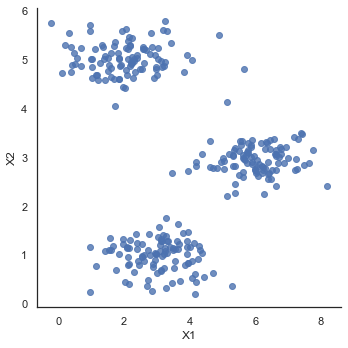

In [43]:
# 绘图设置
sb.set(context='notebook', style='white')
# 对数据进行回归显示
sb.lmplot('X1', 'X2', data=data2, fit_reg=False)
plt.show()

In [44]:
# 计算簇的聚类中心
def compute_centroids(X, idx, k):
    # print(m, n) 300 2     
    m, n = X.shape
    
    # print(centroids.shape) (3, 2)    
    centroids = np.zeros((k, n))
    
    for i in range(k):
        # 找出所有归类为该聚类中心的样本点
        indices = np.where(idx == i)
        # 重新计算聚类中心的位置         
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
    
    return centroids

In [45]:
compute_centroids(X, idx, 3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [46]:
def run_k_means(X, initial_centroids, max_iters):
    # 样本点的个数，形状（二维）
    m, n = X.shape
    # 聚类中心的个数     
    k = initial_centroids.shape[0]
    
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        # 归类样本点         
        idx = find_closest_centroids(X, centroids)
        # 重新计算聚类中心
        centroids = compute_centroids(X, idx, k)
        
    return idx, centroids

In [47]:
idx, centroids = run_k_means(X, initial_centroids, 10)

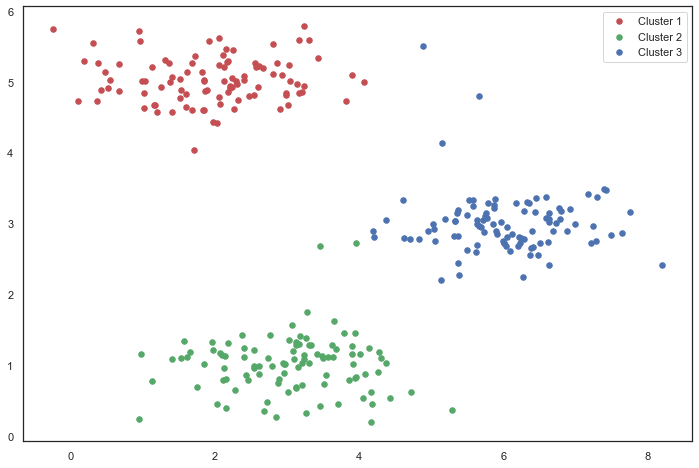

In [48]:
# np.where()[0] 表示行的索引
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()
plt.show()

In [49]:
# 随机选择样本作为初始化聚类中心的函数
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    # 随机选择0-m中的k个下标    
    idx = np.random.randint(0, m, k)
    
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    
    return centroids

In [50]:
init_centroids(X, 3)

array([[5.73284945, 2.87738132],
       [2.92658295, 5.09667923],
       [3.29765181, 5.59205535]])

### 应用于图像压缩

使用聚类来找到最具代表性的少数颜色，并使用聚类分配将原始的24位颜色映射到较低维的颜色空间。

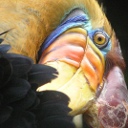

In [51]:
from IPython.display import Image
Image(filename='./datasets/bird_small.png')

In [52]:
image_data = loadmat('./datasets/bird_small.mat')
image_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Jun  5 04:06:24 2012',
 '__version__': '1.0',
 '__globals__': [],
 'A': array([[[219, 180, 103],
         [230, 185, 116],
         [226, 186, 110],
         ...,
         [ 14,  15,  13],
         [ 13,  15,  12],
         [ 12,  14,  12]],
 
        [[230, 193, 119],
         [224, 192, 120],
         [226, 192, 124],
         ...,
         [ 16,  16,  13],
         [ 14,  15,  10],
         [ 11,  14,   9]],
 
        [[228, 191, 123],
         [228, 191, 121],
         [220, 185, 118],
         ...,
         [ 14,  16,  13],
         [ 13,  13,  11],
         [ 11,  15,  10]],
 
        ...,
 
        [[ 15,  18,  16],
         [ 18,  21,  18],
         [ 18,  19,  16],
         ...,
         [ 81,  45,  45],
         [ 70,  43,  35],
         [ 72,  51,  43]],
 
        [[ 16,  17,  17],
         [ 17,  18,  19],
         [ 20,  19,  20],
         ...,
         [ 80,  38,  40],
         [ 68,  39,  40],
     

In [53]:
A = image_data['A']
A.shape

(128, 128, 3)

In [54]:
A = A / 255.

# 数组转化，每一行是一个像素点
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
X.shape, X[:3]

((16384, 3),
 array([[0.85882353, 0.70588235, 0.40392157],
        [0.90196078, 0.7254902 , 0.45490196],
        [0.88627451, 0.72941176, 0.43137255]]))

In [55]:
# randomly initialize the centroids
initial_centroids = init_centroids(X, 16)
print(initial_centroids.shape)

# 迭代后的样本点归类和聚类中心
idx, centroids = run_k_means(X, initial_centroids, 10)
print(idx.shape, centroids.shape)

# 计算最后一次的样本点归类
idx = find_closest_centroids(X, centroids)
print(idx.astype(int))

# map each pixel to the centroid value
# 将每个像素点映射到中心值
X_recovered = centroids[idx.astype(int),:]
X_recovered.shape

(16, 3)
(16384,) (16, 3)
[ 1  1  1 ... 13 13 13]


(16384, 3)

In [56]:
# reshape to the original dimensions
# 转换成原始尺寸
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
X_recovered.shape

(128, 128, 3)

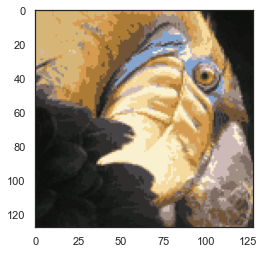

In [57]:
plt.imshow(X_recovered)
plt.show()

#### 用scikit-learn来实现K-means

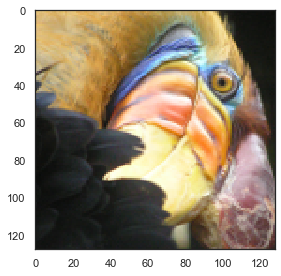

In [58]:
from skimage import io
pic = io.imread('./datasets/bird_small.png') / 255.
io.imshow(pic)
plt.show()

In [59]:
pic.shape

(128, 128, 3)

In [60]:
data = pic.reshape(128 * 128, 3)
data.shape

(16384, 3)

In [61]:
# 导入kmeans库
from sklearn.cluster import KMeans

# n_clusters 簇的个数， n_init 获取初始簇中心的更迭次数，n_jobs 并行设置
model = KMeans(n_clusters=16, n_init=100, n_jobs=-1)

In [62]:
model.fit(data)

E:\SoftWare\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=16, n_init=100, n_jobs=-1)

In [63]:
# 最后一次的聚类中心
centroids = model.cluster_centers_
print(centroids.shape)

# 样本的的最终归类
C = model.predict(data)
print(C.shape)

(16, 3)
(16384,)


In [71]:
# 样本点映射为簇中心值
centroids[C].shape, centroids[C]

((16384, 3),
 array([[0.8678115 , 0.71644988, 0.45469712],
        [0.8678115 , 0.71644988, 0.45469712],
        [0.8678115 , 0.71644988, 0.45469712],
        ...,
        [0.16025596, 0.16246801, 0.15408242],
        [0.16025596, 0.16246801, 0.15408242],
        [0.16025596, 0.16246801, 0.15408242]]))

In [72]:
# 转换成原始尺寸
compressed_pic = centroids[C].reshape((128,128,3))

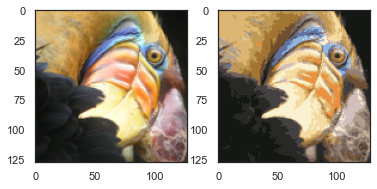

In [73]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(pic)
ax[1].imshow(compressed_pic)
plt.show()